In [1]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

In [2]:
faces=fetch_lfw_people(min_faces_per_person=60)


In [3]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


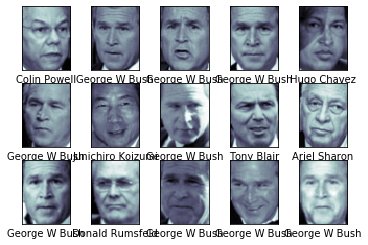

In [4]:
fig,ax=plt.subplots(3,5)
for i,axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap='bone')
    axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])

In [5]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [6]:
pca=PCA(n_components=150,whiten=True,random_state=42)

In [7]:
svc=SVC(kernel='rbf',class_weight='balanced')
model=make_pipeline(pca,svc)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(faces.data,faces.target,random_state=42)

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
param_grid={'svc__C':[1,5,10,50],
            'svc__gamma':[0.0001,0.0005,0.001,0.005]}
           
grid=GridSearchCV(model,param_grid)

In [13]:
 grid.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=150, random_state=42,
                                            svd_solver='auto', tol=0.0,
                                            whiten=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            ran

In [14]:
print(grid.best_params_)


{'svc__C': 10, 'svc__gamma': 0.001}


In [15]:
print(grid.best_score_)

0.8279129883431693


In [16]:
model=grid.best_estimator_
yfit=model.predict(x_test)

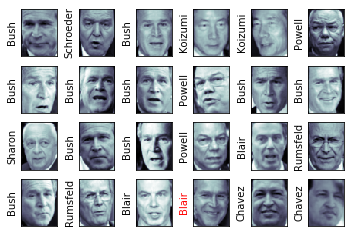

In [20]:
fit,ax=plt.subplots(4,6)
for i,axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(62,47),cmap='bone')
    axi.set(xticks=[],yticks=[])
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
color='black' if yfit[i] == y_test[i] else 'red')

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yfit,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat=confusion_matrix(y_test,yfit)

Text(91.68, 0.5, 'predict label')

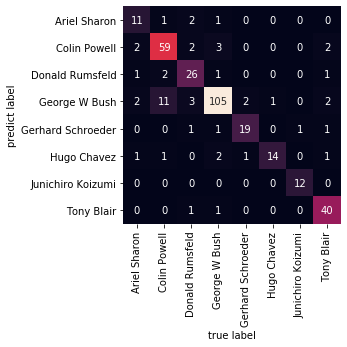

In [28]:
p=sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False,xticklabels=faces.target_names,yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predict label')